SLIDE 92 du PDF corrigé
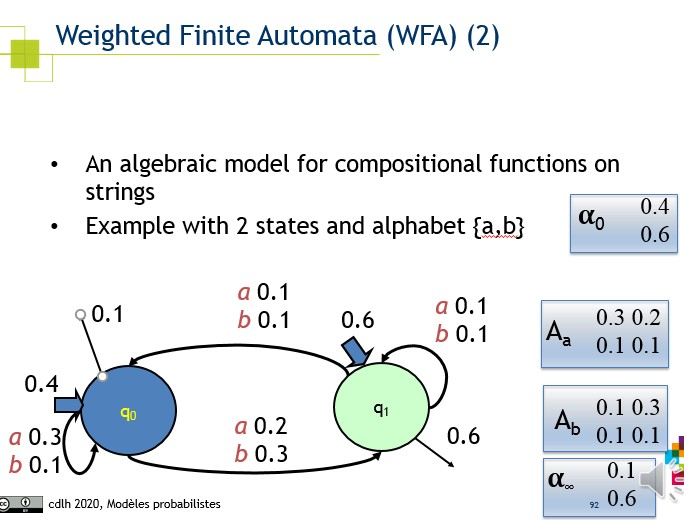

In [1]:
import numpy as np

In [2]:
a = {}
a[0]=np.matrix('0.4 0.6')
a['a']=np.matrix('0.3 0.2 ; 0.1 0.1')
a['b']=np.matrix('0.1 0.3 ; 0.1 0.1')
a['$']=np.matrix('0.1 ; 0.6')

In [11]:
a

{0: matrix([[0.4, 0.6]]), 'a': matrix([[0.3, 0.2],
         [0.1, 0.1]]), 'b': matrix([[0.1, 0.3],
         [0.1, 0.1]]), '$': matrix([[0.1],
         [0.6]])}

In [3]:
print (np.dot(a[0],a['a']))

[[0.18 0.14]]


In [4]:
r=a[0]
r=np.dot(r,a['a'])
r=np.dot(r,a['$'])
r

matrix([[0.102]])

In [5]:
def parser(string, A):
    prob = A[0]
    for char in string:
        prob = np.dot(prob, A[char])
    return np.dot(prob, A['$'])

In [6]:
print(parser("baab", a))

[[0.004396]]


In [127]:
def forward(A, n, string, logs):
    # inner function
    def forward_Initialisation(A, M, i, j, char, logs):
        res = 0
        for k in range(0, M.shape[0]):
            res += A[char][k,i] * M[k, j-1]
        return res
    # process
    
    # initialisation 
    M = np.zeros((n, len(string)+1))
    M[0,0] = A[0][0, 0]
    M[1,0] = A[0][0, 1]
    # Iteration
    for j in range(1, M.shape[1]):
        for i in range(0, M.shape[0]):
            M[i,j] = forward_Initialisation(a, M, i, j, string[j-1], True)
    print(M)
    # probability
    proba = 0
    j = M.shape[1]-1
    for i in range(0, M.shape[0]):
        proba += M[i,j] * A['$'][i,0]
    return proba

In [128]:
prob = forward(a, 2, "baab", True)
print("P('baab') =",prob)

[[0.4     0.1     0.048   0.0182  0.00316]
 [0.6     0.18    0.038   0.0134  0.0068 ]]
P('baab') = 0.004396000000000001


In [141]:
def backward(A, n, string, logs):
    # inner function
    def forward_Initialisation(A, M, i, j, char, logs):
        res = 0
        for k in range(0, M.shape[0]):
            res += A[char][i,k] * M[k, j]
        return res
    # process
    
    # initialisation
    M = np.zeros((n, len(string)+1))
    j_temp = M.shape[1]-1
    M[0,j_temp] = A['$'][0, 0]
    M[1,j_temp] = A['$'][1, 0]
    print(M)
    # Iteration
    for j in range(M.shape[1]-1, 0, -1):
        for i in range(0, M.shape[0]):
            M[i,j-1] = forward_Initialisation(a, M, i, j, string[j-1], True)
    print(M)
    # probability
    proba = 0
    for k in range(0, M.shape[0]):
        proba += M[k,0] * A[0][0,k]
    return proba

In [142]:
prob = backward(a, 2, "baab", True)
print("P('baab') =",prob)

[[0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.6]]
[[0.00556 0.0265  0.071   0.19    0.1    ]
 [0.00362 0.0097  0.026   0.07    0.6    ]]
P('baab') = 0.004395999999999999


In [124]:
M = np.zeros((2, len('baab')+1))
j_temp = M.shape[1]-1
M[0,j_temp] = a['$'][0, 0]
M[1,j_temp] = a['$'][1, 0]
print(M)
# Iteration
for j in range(M.shape[1]-1, 0, -1):
    print(j)

[[0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.6]]
4
3
2
1
